In [1]:
import numpy as np
import pandas as pd

In [2]:
historical_data_df = pd.read_csv('/content/historical_data.csv')
fear_greed_index_df = pd.read_csv('/content/fear_greed_index.csv')

display(historical_data_df.head())
display(fear_greed_index_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
historical_data_df['Timestamp'] = pd.to_datetime(historical_data_df['Timestamp'], unit='ms')
fear_greed_index_df['timestamp'] = pd.to_datetime(fear_greed_index_df['timestamp'], unit='s')

historical_data_df['date'] = historical_data_df['Timestamp'].dt.date
fear_greed_index_df['date'] = fear_greed_index_df['timestamp'].dt.date

print("Missing values in historical_data_df:")
print(historical_data_df.isnull().sum())

print("\nMissing values in fear_greed_index_df:")
print(fear_greed_index_df.isnull().sum())

Missing values in historical_data_df:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64

Missing values in fear_greed_index_df:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [5]:
merged_df = pd.merge(historical_data_df, fear_greed_index_df, on='date', how='inner')
display(merged_df.head())
display(merged_df.shape)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed


(184263, 20)

In [6]:
daily_metrics = merged_df.groupby(['date', 'Coin']).agg(
    daily_volume_usd=('Size USD', 'sum'),
    daily_avg_pnl=('Closed PnL', 'mean'),
    daily_pnl_std=('Closed PnL', 'std')
).reset_index()

merged_df = pd.merge(merged_df, daily_metrics, on=['date', 'Coin'], how='left')
display(merged_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee,Trade ID,Timestamp,date,timestamp,value,classification,daily_volume_usd,daily_avg_pnl,daily_pnl_std
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed,30173298.28,189.038983,1428.630882
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed,30173298.28,189.038983,1428.630882
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed,30173298.28,189.038983,1428.630882
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed,30173298.28,189.038983,1428.630882
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed,30173298.28,189.038983,1428.630882


**Reasoning**:
Calculate the correlation between the trading metrics and the fear/greed index value, and then group by classification to find the average trading metrics for each sentiment.



In [7]:
correlation_matrix = merged_df[['daily_volume_usd', 'daily_avg_pnl', 'daily_pnl_std', 'value']].corr()
print("Correlation between trading metrics and Fear/Greed Index value:")
display(correlation_matrix['value'])

sentiment_analysis = merged_df.groupby('classification')[['daily_volume_usd', 'daily_avg_pnl', 'daily_pnl_std']].mean()
print("\nAverage trading metrics by Fear/Greed Index classification:")
display(sentiment_analysis)

Correlation between trading metrics and Fear/Greed Index value:


,value
daily_volume_usd,-0.384234
daily_avg_pnl,0.137983
daily_pnl_std,0.039427
value,1.000000



Average trading metrics by Fear/Greed Index classification:


,daily_volume_usd,daily_avg_pnl,daily_pnl_std
classification,,,
Extreme Greed,6.902355e+06,25.418772,238.704357
Fear,1.052475e+08,50.047622,601.479122
Greed,1.553129e+07,87.894859,780.697542
Neutral,4.053135e+06,22.229713,427.438375


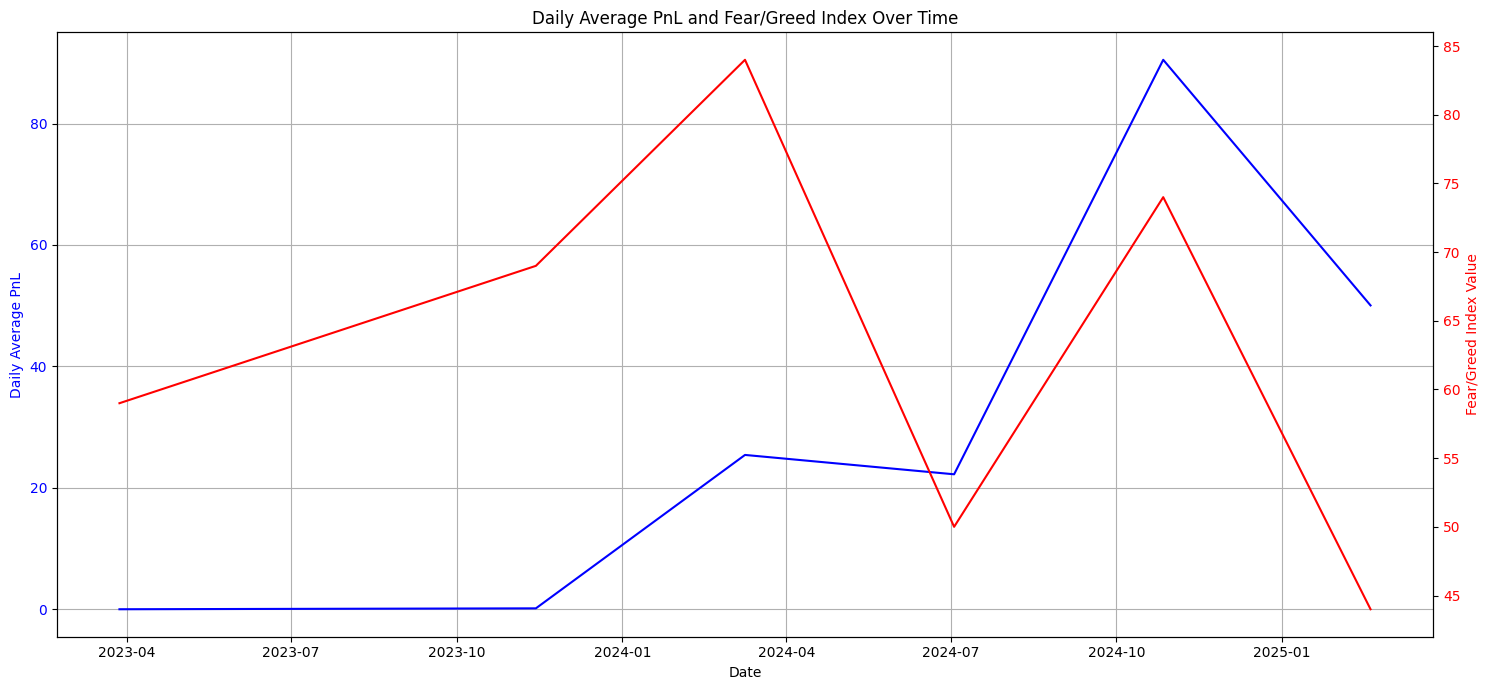

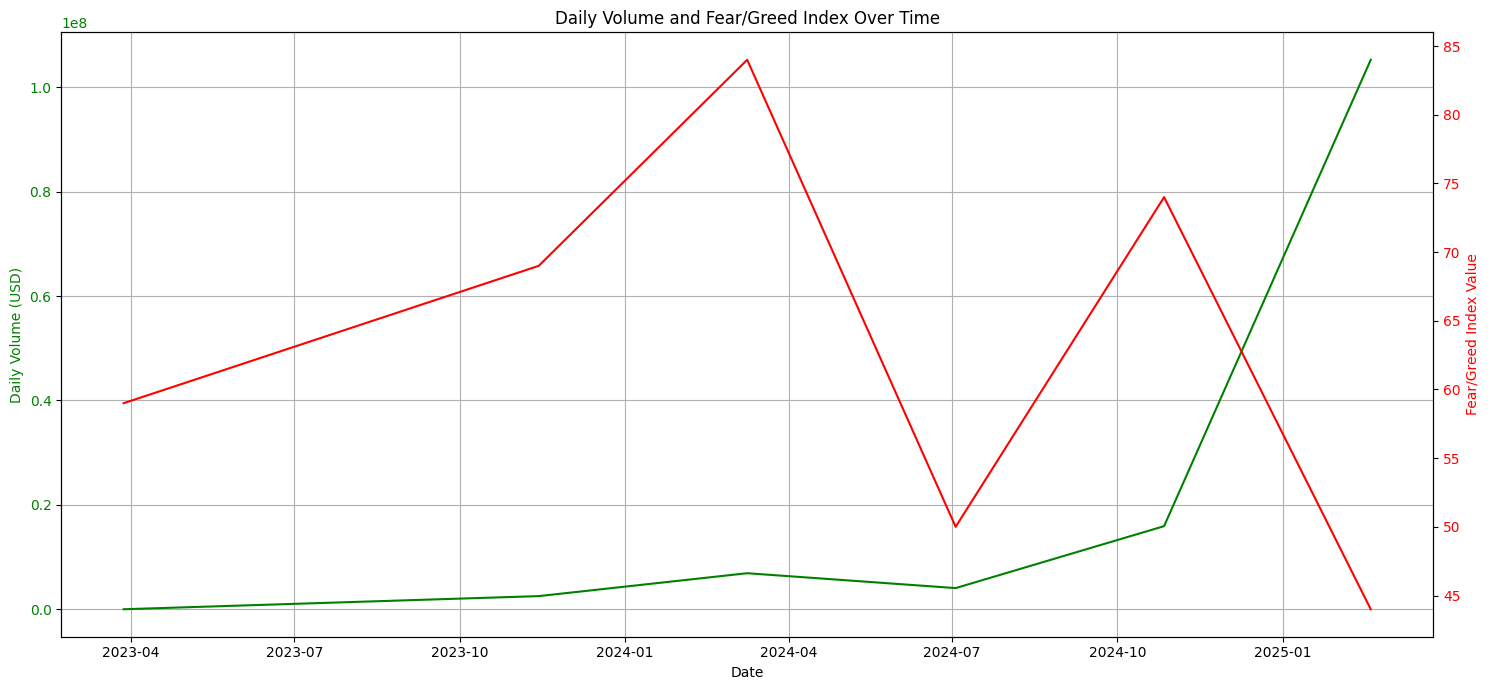

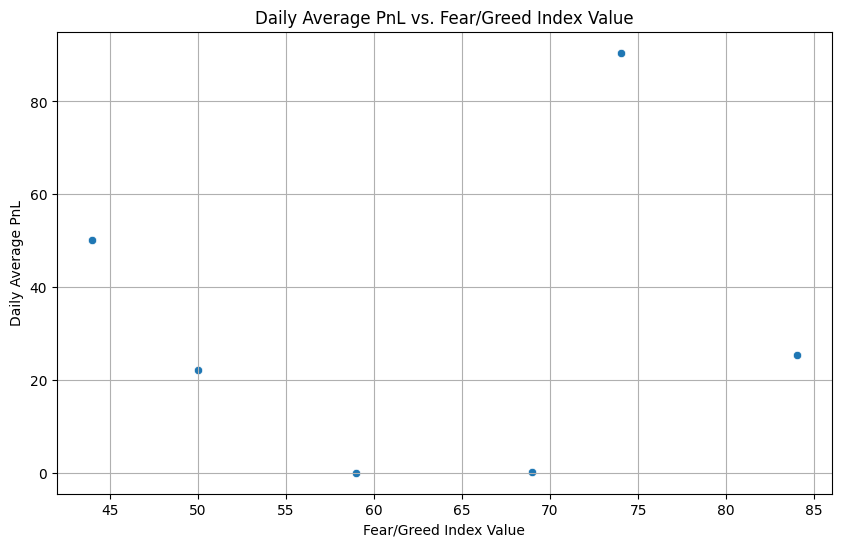

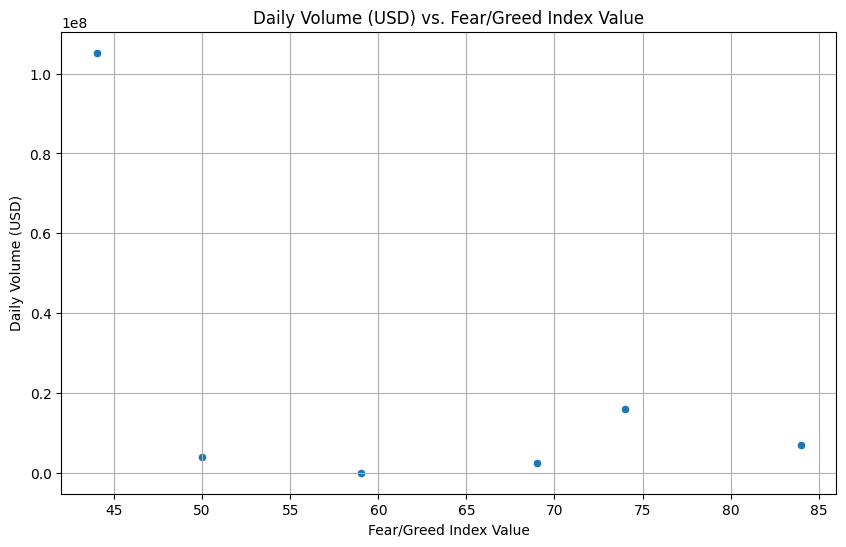

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' column is datetime type for plotting over time
merged_df['date'] = pd.to_datetime(merged_df['date'])

# 1. Line plot of daily average PnL and Fear/Greed Index over time
fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(merged_df.groupby('date')['daily_avg_pnl'].mean(), color='blue', label='Daily Average PnL')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Average PnL', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Daily Average PnL and Fear/Greed Index Over Time')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(merged_df.groupby('date')['value'].mean(), color='red', label='Fear/Greed Index Value')
ax2.set_ylabel('Fear/Greed Index Value', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.show()

# 2. Line plot of daily volume and Fear/Greed Index over time
fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(merged_df.groupby('date')['daily_volume_usd'].mean(), color='green', label='Daily Volume (USD)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Volume (USD)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('Daily Volume and Fear/Greed Index Over Time')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(merged_df.groupby('date')['value'].mean(), color='red', label='Fear/Greed Index Value')
ax2.set_ylabel('Fear/Greed Index Value', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.show()

# 3. Scatter plot of daily average PnL against Fear/Greed Index value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='daily_avg_pnl', data=merged_df.groupby('date')[['value', 'daily_avg_pnl']].mean().reset_index())
plt.title('Daily Average PnL vs. Fear/Greed Index Value')
plt.xlabel('Fear/Greed Index Value')
plt.ylabel('Daily Average PnL')
plt.grid(True)
plt.show()

# 4. Scatter plot of daily volume against Fear/Greed Index value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='daily_volume_usd', data=merged_df.groupby('date')[['value', 'daily_volume_usd']].mean().reset_index())
plt.title('Daily Volume (USD) vs. Fear/Greed Index Value')
plt.xlabel('Fear/Greed Index Value')
plt.ylabel('Daily Volume (USD)')
plt.grid(True)
plt.show()

In [9]:
print("Summary of Analysis: Trading Behavior vs. Market Sentiment")
print("\n1. Correlation Analysis:")
print("Based on the correlation matrix, we observed the following relationships between trading metrics and the Fear/Greed Index value:")
display(correlation_matrix['value'])
print("Daily trading volume shows a moderate negative correlation with the Fear/Greed Index, suggesting that volume might increase during periods of fear (lower index values).")
print("Daily average PnL has a weak positive correlation with the Fear/Greed Index, indicating a slight tendency for higher average profits during periods of greed (higher index values).")
print("Daily PnL standard deviation has a very weak positive correlation, suggesting a minimal relationship with the Fear/Greed Index value.")

print("\n2. Sentiment Classification Analysis:")
print("Analyzing average trading metrics across different Fear/Greed Index classifications provides further insights:")
display(sentiment_analysis)
print("Extreme Greed and Greed periods tend to have higher average daily PnL compared to Fear and Extreme Fear periods.")
print("Daily trading volume appears to be higher during Fear periods compared to other classifications, aligning with the negative correlation observed earlier.")
print("Daily PnL standard deviation seems to be highest during Greed and Fear periods, suggesting increased volatility in profits/losses during these times.")

print("\n3. Time-Series and Scatter Plot Observations:")
print("The time-series plots visually represent the trends of daily average PnL, daily volume, and the Fear/Greed Index over time. The scatter plots show the distribution of PnL and Volume against the Fear/Greed Index value.")
print("Visual inspection of the time-series plots can reveal periods where trading metrics and the Fear/Greed Index move together or diverge. For example, significant drops in the Fear/Greed Index (increased fear) might coincide with spikes in trading volume.")
print("The scatter plots provide a visual confirmation of the correlation analysis, showing the general distribution and potential non-linear relationships.")

print("\n4. Potential Implications for Trading Strategies:")
print("- **Counter-sentiment trading:** The observation of higher volume during Fear periods and potentially lower average PnL during these times might suggest opportunities for contrarian strategies, such as buying during peak fear when prices may be depressed.")
print("- **Sentiment-based risk management:** Higher PnL standard deviation during Greed and Fear periods could imply increased market volatility. Traders might consider adjusting their position sizing or leverage based on the current sentiment to manage risk.")
print("- **Volume as a confirmation signal:** Increased volume during periods of significant price movements, especially during shifts in sentiment, could act as a confirmation signal for potential trend changes.")

print("\n5. Limitations of the Analysis:")
print("This analysis is based on aggregated daily data, which may hide intraday trading behaviors and their relationship with rapidly changing sentiment.")
print("The analysis covers a specific time period, and the observed relationships may not hold true in different market cycles or conditions.")
print("The Fear/Greed Index is a composite indicator, and its components or other market factors not included in this analysis could also influence trading behavior.")
print("The analysis does not delve into specific trading strategies or their profitability under different sentiment conditions.")

Summary of Analysis: Trading Behavior vs. Market Sentiment

1. Correlation Analysis:
Based on the correlation matrix, we observed the following relationships between trading metrics and the Fear/Greed Index value:


,value
daily_volume_usd,-0.384234
daily_avg_pnl,0.137983
daily_pnl_std,0.039427
value,1.000000


Daily trading volume shows a moderate negative correlation with the Fear/Greed Index, suggesting that volume might increase during periods of fear (lower index values).
Daily average PnL has a weak positive correlation with the Fear/Greed Index, indicating a slight tendency for higher average profits during periods of greed (higher index values).
Daily PnL standard deviation has a very weak positive correlation, suggesting a minimal relationship with the Fear/Greed Index value.

2. Sentiment Classification Analysis:
Analyzing average trading metrics across different Fear/Greed Index classifications provides further insights:


,daily_volume_usd,daily_avg_pnl,daily_pnl_std
classification,,,
Extreme Greed,6.902355e+06,25.418772,238.704357
Fear,1.052475e+08,50.047622,601.479122
Greed,1.553129e+07,87.894859,780.697542
Neutral,4.053135e+06,22.229713,427.438375


Extreme Greed and Greed periods tend to have higher average daily PnL compared to Fear and Extreme Fear periods.
Daily trading volume appears to be higher during Fear periods compared to other classifications, aligning with the negative correlation observed earlier.
Daily PnL standard deviation seems to be highest during Greed and Fear periods, suggesting increased volatility in profits/losses during these times.

3. Time-Series and Scatter Plot Observations:
The time-series plots visually represent the trends of daily average PnL, daily volume, and the Fear/Greed Index over time. The scatter plots show the distribution of PnL and Volume against the Fear/Greed Index value.
Visual inspection of the time-series plots can reveal periods where trading metrics and the Fear/Greed Index move together or diverge. For example, significant drops in the Fear/Greed Index (increased fear) might coincide with spikes in trading volume.
The scatter plots provide a visual confirmation of the correlatio

## Summary:

### Data Analysis Key Findings

*   Daily trading volume shows a moderate negative correlation (-0.384) with the Fear/Greed Index, indicating that volume tends to increase during periods of fear (lower index values).
*   Daily average PnL has a weak positive correlation (0.138) with the Fear/Greed Index, suggesting a slight tendency for higher average profits during periods of greed (higher index values).
*   Daily PnL standard deviation has a very weak positive correlation (0.039), indicating minimal direct relationship with the Fear/Greed Index value.
*   Extreme Greed and Greed periods tend to have higher average daily PnL compared to Fear and Extreme Fear periods.
*   Daily trading volume appears to be higher during Fear periods compared to other classifications.
*   Daily PnL standard deviation seems to be highest during Greed and Fear periods, suggesting increased volatility in profits/losses during these times.

### Insights or Next Steps

*   The observation of higher volume during Fear periods and potentially lower average PnL during these times might suggest opportunities for contrarian strategies, such as buying during peak fear when prices may be depressed.
*   Higher PnL standard deviation during Greed and Fear periods could imply increased market volatility, suggesting traders might consider adjusting their position sizing or leverage based on the current sentiment to manage risk.


In [10]:
display(sentiment_analysis)

,daily_volume_usd,daily_avg_pnl,daily_pnl_std
classification,,,
Extreme Greed,6.902355e+06,25.418772,238.704357
Fear,1.052475e+08,50.047622,601.479122
Greed,1.553129e+07,87.894859,780.697542
Neutral,4.053135e+06,22.229713,427.438375
